In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt


# modelling part
from run import run



In [2]:
# test run

# landcover 1 -Langtang


# ----------- LANGTANG ------------

# climatepath = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/test/langtang_climate_cut/'
climatepath = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/model_runs_notebooks2/for_jacob/langtang_climate_cut/'
# get all folders togetehr 

ls_ = os.listdir(climatepath)
ls = [d for d in ls_ if not d.startswith('.')]
dir0 = os.getcwd()
# print(dir0)
# run the model for each
for d in ls:
    path = os.path.join(climatepath, d)
    if path.endswith('.csv'):
        continue
    # print(path)
    os.chdir(path)
    run()
    os.chdir(dir0)


running sediment module...


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.68it/s]


saving output...
running sediment module...


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.74it/s]


saving output...


In [3]:
testfile = pd.read_csv(climatepath + '/12a/Hydro.out')
testfile['D'] = pd.to_datetime(testfile['D'])
testfile = testfile.set_index('D')

testfile['snowmelt'] = testfile['snowacc'].where(testfile['snowacc'] < 0) * -1
testfile['snowacc'] = testfile['snowacc'].where(testfile['snowacc'] > 0)


In [4]:
testfile

,Q,Qs,Qss,Vw,snow,snowacc,PET,AET,Pr,Ta,glacier_melt,snowmelt
D,,,,,,,,,,,,
1989-09-01 00:00:00,0.000000,0.0,0.000000,0.0,0.0,NaN,2.028531,0.000000,0.009842,3.654126,0.328029,NaN
1989-09-01 01:00:00,0.021085,0.0,0.021085,0.0,0.0,NaN,0.000000,0.000000,0.021085,4.217486,0.000000,NaN
1989-09-01 02:00:00,0.011266,0.0,0.011266,0.0,0.0,NaN,0.044242,0.021070,0.032336,4.998886,0.000000,NaN
1989-09-01 03:00:00,0.000000,0.0,0.000000,0.0,0.0,NaN,0.205823,0.040766,0.040766,6.196086,0.000000,NaN
1989-09-01 04:00:00,0.000000,0.0,0.000000,0.0,0.0,NaN,0.442469,0.029519,0.029519,6.960796,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30 19:00:00,0.000000,0.0,0.000000,0.0,0.0,NaN,2.333064,0.003714,0.003714,1.346846,0.000000,NaN
2022-09-30 20:00:00,0.000000,0.0,0.000000,0.0,0.0,NaN,2.320553,0.001237,0.001237,1.188496,0.000000,NaN
2022-09-30 21:00:00,0.000000,0.0,0.000000,0.0,0.0,NaN,2.301134,0.000000,0.000000,0.942856,0.000000,NaN


In [5]:
AET_monthly = testfile.resample('M').sum()
AET_monthly_mean = AET_monthly.groupby(by=AET_monthly.index.month).mean()
AET_yearly_mean = AET_monthly_mean.sum()


In [6]:
AET_yearly_mean

Q                  979.667714
Qs                 781.272144
Qss                198.395570
Vw                   0.000000
snow            975942.667871
snowacc            383.239793
PET              10140.385570
AET               1589.065588
Pr                2567.937745
Ta              -12147.420768
glacier_melt         0.796706
snowmelt           383.248581
dtype: float64

In [7]:

df = pd.DataFrame(AET_yearly_mean)
df = df.reset_index()
df = df.rename(columns={'index': 'name', 0: 'value'})

df = df[df['name'] != 'snow']
df = df[df['name'] != 'Ta']
df = df[df['name'] != 'snowacc']

Text(0, 0.5, 'mm/year')

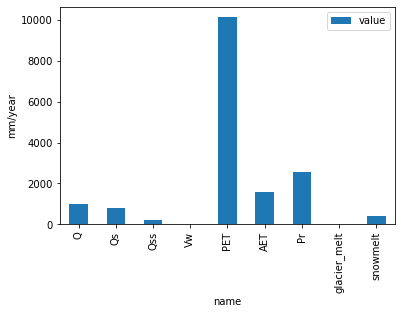

In [8]:
df.plot.bar(x='name', y='value')
plt.ylabel('mm/year')
